<a href="https://colab.research.google.com/github/GiorgiaVitanza/DataScience/blob/master/homework9.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Algorithms Homework

In this homework assignment, you will apply three fundamental machine learning algorithms to famous datasets:

1. **Linear Regression**: Boston Housing Price Prediction
2. **Logistic Regression**: Breast Cancer Classification
3. **Decision Tree**: Titanic Survival Prediction

### Instructions

- Implement **at least** one algorithm
- Complete each section carefully
- Add your code where indicated by `# YOUR CODE HERE`
- Provide comments explaining your approach

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Specific Algorithms
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Metrics and Datasets
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

# Set random seed for reproducibility
np.random.seed(42)

# 1: Linear Regression - Boston Housing Price Prediction

### Task
- Load the Boston Housing dataset
- Preprocess the data
- Split into training and testing sets
- Train a Linear Regression model
- Evaluate model performance

In [29]:
# Load Boston Housing dataset
boston = fetch_openml(name="boston", version=1, as_frame=True)

# Extract features and target
X, y = boston.data, boston.target

boston.frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


We can observe a dataset with numeric features only,  therefore we don't need to encode any column.

In [30]:
# TODO: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We perform the splitting of the dataset in order to use part of the dataset (train set 80%) to train our model and part of the dataset to validate our model (test set 20%). The random state is set to make the results reproducible.

In [31]:
# TODO: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In this case one uses the Standard scaler to have all the columns distributed as a normal distribution with mean equal to 0 and variance equal to 1. The scaling is performed for both the parts of the dataset before splitted. The scaling is performed after the splitting in order to avoid the data leakage.

In [32]:
# TODO: Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

We have used the train part of the dataset to train our Linear regression model.

In [33]:
# TODO: Make predictions and calculate performance metrics
y_pred = lr_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

The test part is used to predict new values different from the train values and the metrics calculated in this case are the mean squared error and the R - squared that helps us to recognize how our model performs.

In [34]:
# TODO: Print performance metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 24.29
R-squared: 0.67


In this case we are explaining the 67% of the data.

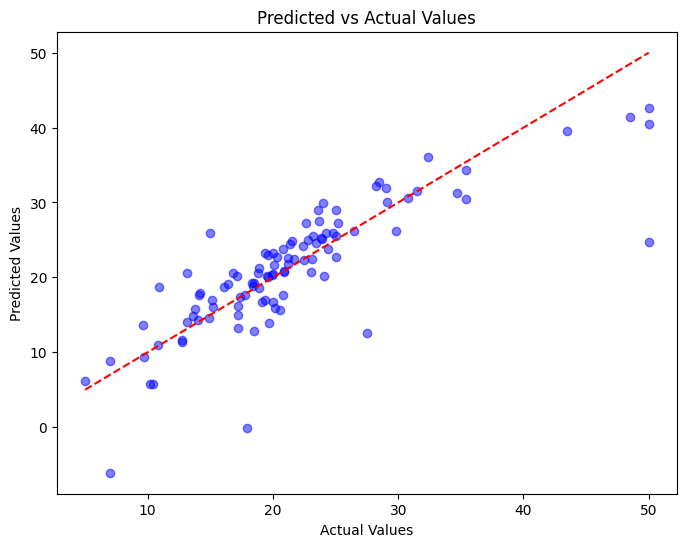

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Linea ideale y = x
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()


## Part 2: Logistic Regression - Breast Cancer Classification

### Task
- Load the Breast Cancer dataset
- Preprocess the data
- Split into training and testing sets
- Train a Logistic Regression model
- Evaluate model performance

In [64]:
#load dataset
breast_cancer = load_breast_cancer()
breast_cancer_data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
X_cancer = breast_cancer.data
y_cancer = breast_cancer.target

breast_cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [65]:
y_cancer

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In this case our target variable is categorical, then we can use a logistic regression model. The remaining part of the exercise is similar to the previuos one.

In [48]:
# TODO: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer)

In [49]:
# TODO: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
# TODO: Train a Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [51]:
# TODO: Make predictions and calculate performance metrics
y_pred = log_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

In this case we have different metrics to calculate as accuracy, precision, recall and f1score.

In [52]:
# TODO: Print performance metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.98
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        56
           1       0.97      1.00      0.98        87

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



## Part 3: Decision Tree - Titanic Survival Prediction

### Task
- Load the Titanic dataset
- Preprocess the data (handling missing values, encoding categorical variables)
- Split into training and testing sets
- Train a Decision Tree Classifier
- Evaluate model performance

In [53]:
# Load Titanic dataset
titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

In [54]:
# Data Preprocessing
# TODO: Handle missing values
titanic.info()
titanic.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
Siblings/Spouses Aboard,0
Parents/Children Aboard,0
Fare,0


There aren't any missing values to handle in the dataset.

In [55]:
# Feature selection

features = ['Pclass', 'Sex', 'Age', 'Fare']
X_titanic = titanic[features]
y_titanic = titanic['Survived']

In [56]:
# TODO: Scale the features
# YOUR CODE HERE

numeric_features = ['Pclass', 'Age', 'Fare']
scaler = StandardScaler()
X_titanic_scaled = scaler.fit_transform(X_titanic[numeric_features])



In this case we need to distinguish between numerical and categorical features. The target is again categorical, therefore we need a classifier algorithm.

In [57]:
# TODO: Encode the features
# YOUR CODE HERE
categorical_features = ['Sex']
X_titanic_encoded = pd.get_dummies(X_titanic[categorical_features], drop_first=True)
X_titanic_transformed = pd.concat([pd.DataFrame(X_titanic_scaled, columns=numeric_features), X_titanic_encoded], axis=1)

X_titanic_transformed.head()

,Pclass,Age,Fare,Sex_male
0,0.830524,-0.529366,-0.503586,True
1,-1.561277,0.604265,0.783412,False
2,0.830524,-0.245958,-0.490020,False
3,-1.561277,0.391709,0.417948,False
4,0.830524,0.391709,-0.487507,True


Since the categorical feature has only two possible values, the get_dummies method could be suitbale to transform the data about the sex in a binary variable.

In [58]:
# TODO: Split the data into training and testing sets
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X_titanic_transformed, y_titanic, test_size=0.2, random_state=42)

In [59]:
# TODO: Train a Decision Tree Classifier
# YOUR CODE HERE
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [60]:
# TODO: Make predictions and calculate performance metrics
# YOUR CODE HERE
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)



In [61]:
# TODO: Print performance metrics
# YOUR CODE HERE
print(f"Accuracy: {accuracy}")
print(f"\nClassification Report:\n {classification_rep}")

Accuracy: 0.7528089887640449

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       111
           1       0.67      0.67      0.67        67

    accuracy                           0.75       178
   macro avg       0.74      0.74      0.74       178
weighted avg       0.75      0.75      0.75       178



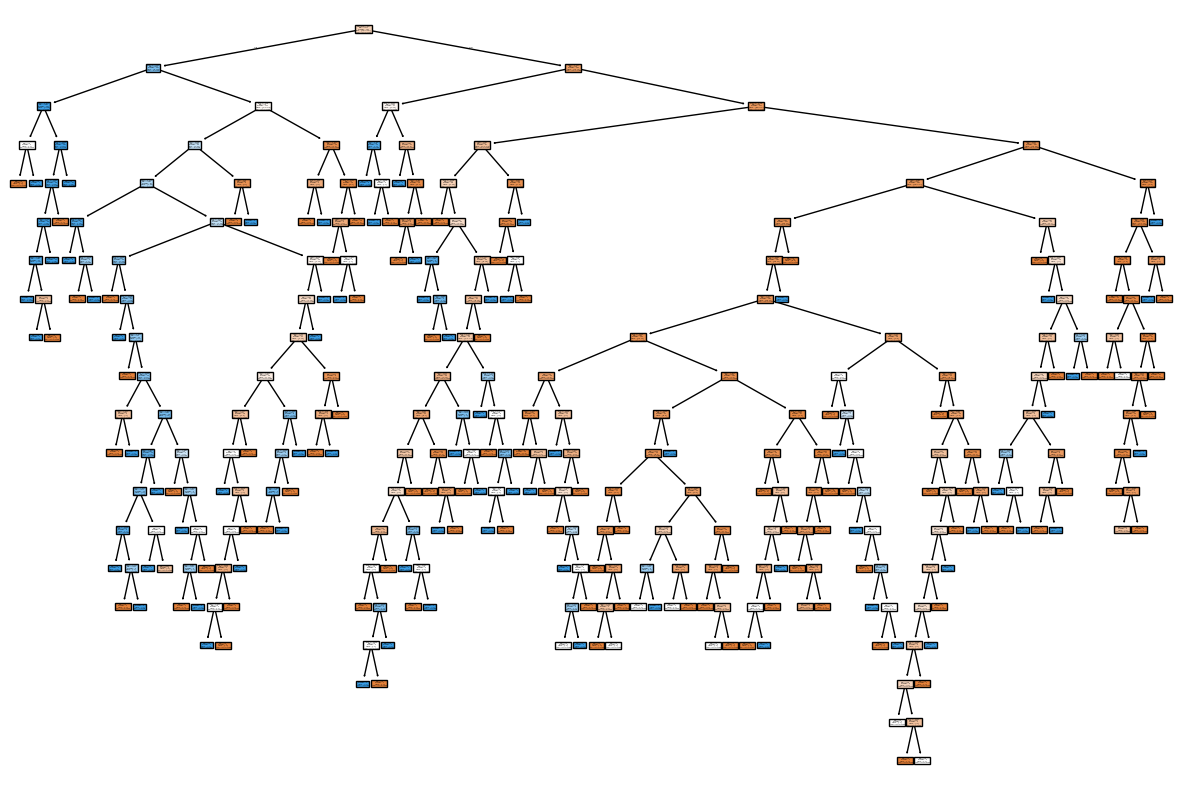

In [62]:
# TODO: Visualize Decision Tree
# YOUR CODE HERE
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()